In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Information of the dataset

In [2]:
df = pd.read_csv(r'C:\Users\jingl\NSS Analytics DA14\Project\capstones\amazon sales data\amazon dataset\Amazon sales_Raw.csv')

In [3]:
df.head()


,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,6/13/2013,6/17/2013,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,6/9/2011,6/14/2011,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,6/9/2011,6/14/2011,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,6/9/2011,6/14/2011,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,6/9/2011,6/14/2011,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [4]:
df.shape

(3203, 10)

In [5]:
df.describe()

,Sales,Quantity,Profit
count,3203.000000,3203.000000,3203.000000
mean,226.493266,3.828910,33.849138
std,524.876911,2.260947,174.109155
min,0.990000,1.000000,-3399.980000
25%,19.440000,2.000000,3.850000
50%,60.840000,3.000000,11.170000
75%,215.810000,5.000000,33.000000
max,13999.960000,14.000000,6719.980000


In [6]:
df.isnull().sum()

Order ID        0
Order Date      0
Ship Date       0
EmailID         0
Geography       0
Category        0
Product Name    0
Sales           0
Quantity        0
Profit          0
dtype: int64

In [7]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'EmailID', 'Geography',
       'Category', 'Product Name', 'Sales', 'Quantity', 'Profit'],
      dtype='object')

## CLEAN THE DATE BY TO_DATETIME

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,6/17/2013,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,2011-06-09,6/14/2011,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,2011-06-09,6/14/2011,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,2011-06-09,6/14/2011,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,2011-06-09,6/14/2011,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [9]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.head()

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


## Which is the highest selling category?

In [10]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending = False)

In [11]:
category_sales.head()

Category
Chairs         101781.36
Phones          98684.39
Tables          84754.60
Storage         70532.84
Accessories     61114.10
Name: Sales, dtype: float64

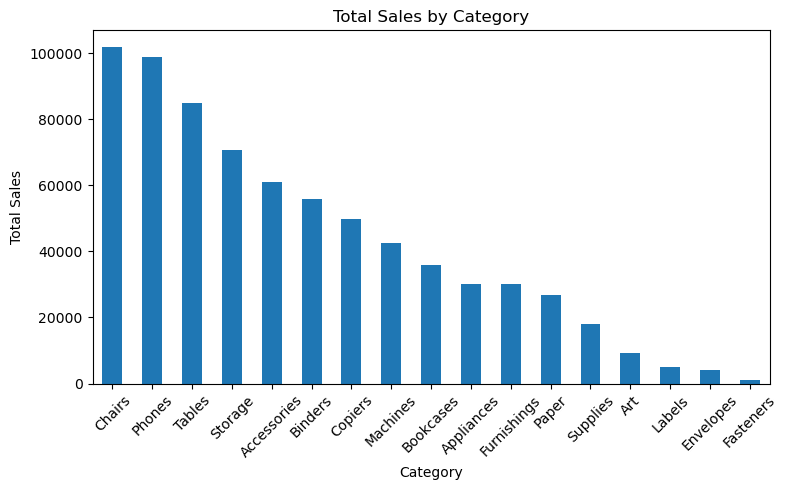

In [12]:
category_sales.plot(kind='bar', figsize=(8, 5), title='Total Sales by Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Answer: The highest selling category is Chairs 

## Whhich month is the best selling time ?

In [13]:
day_sales = df.groupby('Order Date')['Sales'].sum().sort_values(ascending = False)

In [14]:
day_sales

Order Date
2014-03-24    14299.08
2011-07-25     8341.29
2013-03-11     7662.96
2012-12-01     6956.64
2014-08-19     6522.65
                ...   
2012-03-08        3.41
2014-09-06        2.78
2012-11-09        2.48
2012-07-19        2.03
2014-07-10        1.08
Name: Sales, Length: 845, dtype: float64

In [15]:
df['Month'] = df['Order Date'].dt.month

In [16]:
monthly_sales = df.groupby('Month')['Sales'].sum().sort_values(ascending=False)

In [17]:
monthly_sales

Month
12    115934.58
11     93068.81
9      81618.46
3      73023.73
7      64706.95
8      62674.32
10     57436.79
6      48519.54
5      45320.89
4      41966.59
1      24918.63
2      16268.64
Name: Sales, dtype: float64

In [18]:
best_month = monthly_sales.idxmax()
best_month

np.int32(12)

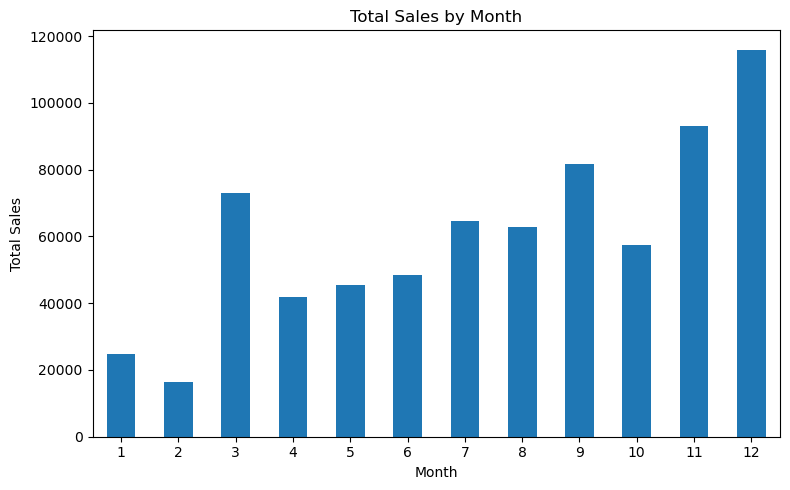

In [19]:
monthly_sales.sort_index().plot(kind='bar', figsize=(8,5), title='Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Answer: The best month is December 

## Which area is the best selling city? Which is the lowest selling city?

In [20]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'EmailID', 'Geography',
       'Category', 'Product Name', 'Sales', 'Quantity', 'Profit', 'Month'],
      dtype='object')

In [21]:
df['Geography'].sample(10)  

71           United States,San Diego,California
2703          United States,Great Falls,Montana
2354       United States,Los Angeles,California
1747       United States,Los Angeles,California
82                United States,Portland,Oregon
2524     United States,Moreno Valley,California
2786           United States,Seattle,Washington
1531    United States,Colorado Springs,Colorado
1156       United States,Los Angeles,California
1606       United States,Los Angeles,California
Name: Geography, dtype: object

In [22]:
df['Geography'].unique()[:20]

array(['United States,Los Angeles,California',
       'United States,Seattle,Washington',
       'United States,West Jordan,Utah',
       'United States,San Francisco,California',
       'United States,Orem,Utah', 'United States,Gilbert,Arizona',
       'United States,Portland,Oregon', 'United States,Aurora,Colorado',
       'United States,Phoenix,Arizona',
       'United States,Roseville,California',
       'United States,Pasadena,California',
       'United States,Scottsdale,Arizona',
       'United States,San Jose,California',
       'United States,Carlsbad,New Mexico',
       'United States,Redlands,California',
       'United States,Denver,Colorado',
       'United States,Whittier,California',
       'United States,Santa Clara,California',
       'United States,San Diego,California',
       'United States,Brentwood,California'], dtype=object)

In [23]:
df[['Country', 'City', 'State']] = df['Geography'].str.split(',', expand=True)
df[['Country', 'City', 'State']].head()

,Country,City,State
0,United States,Los Angeles,California
1,United States,Los Angeles,California
2,United States,Los Angeles,California
3,United States,Los Angeles,California
4,United States,Los Angeles,California


In [24]:
df['Country'] = df['Country'].str.strip()
df['Country'] 

0       United States
1       United States
2       United States
3       United States
4       United States
            ...      
3198    United States
3199    United States
3200    United States
3201    United States
3202    United States
Name: Country, Length: 3203, dtype: object

In [25]:
df['City'] = df['City'].str.strip()
df['City']

0       Los Angeles
1       Los Angeles
2       Los Angeles
3       Los Angeles
4       Los Angeles
           ...     
3198    Los Angeles
3199     Costa Mesa
3200     Costa Mesa
3201     Costa Mesa
3202    Westminster
Name: City, Length: 3203, dtype: object

In [26]:
df['State'] = df['State'].str.strip()
df['State']

0       California
1       California
2       California
3       California
4       California
           ...    
3198    California
3199    California
3200    California
3201    California
3202    California
Name: State, Length: 3203, dtype: object

In [27]:
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
city_sales

City
Los Angeles        175851.33
Seattle            119540.74
San Francisco      112669.09
San Diego           47521.05
Denver              12198.78
                     ...    
Billings                8.29
Layton                  4.96
Auburn                  4.18
Everett                 3.86
San Luis Obispo         3.62
Name: Sales, Length: 169, dtype: float64

In [28]:
top_city = city_sales.idxmax()
top_city 

'Los Angeles'

In [29]:
bottom_city = city_sales.idxmin()
bottom_city

'San Luis Obispo'

In [30]:
df.to_csv('city_sales_cleaned.csv', index=False)

## Time Series Forecast

In [36]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'EmailID', 'Geography',
       'Category', 'Product Name', 'Sales', 'Quantity', 'Profit', 'Month',
       'Country', 'City', 'State', 'Order Month'],
      dtype='object')

In [37]:
df['Order Month'] = df['Order Date'].dt.to_period('M')
df['Order Month'] 

0       2013-06
1       2011-06
2       2011-06
3       2011-06
4       2011-06
         ...   
3198    2013-09
3199    2014-02
3200    2014-02
3201    2014-02
3202    2014-05
Name: Order Month, Length: 3203, dtype: period[M]

In [38]:
monthly_sales = df.groupby('Order Month')['Sales'].sum().reset_index()
monthly_sales.head(15)

,Order Month,Sales
0,2011-01,2648.05
1,2011-02,1348.64
2,2011-03,11008.91
3,2011-04,9343.49
4,2011-05,6570.44
5,2011-06,9629.41
6,2011-07,21808.55
7,2011-08,13248.24
8,2011-09,14900.55
9,2011-10,8728.75


In [39]:
monthly_sales['Order Month'] = monthly_sales['Order Month'].dt.to_timestamp()

In [40]:
monthly_sales

,Order Month,Sales
0,2011-01-01,2648.05
1,2011-02-01,1348.64
2,2011-03-01,11008.91
3,2011-04-01,9343.49
4,2011-05-01,6570.44
5,2011-06-01,9629.41
6,2011-07-01,21808.55
7,2011-08-01,13248.24
8,2011-09-01,14900.55
9,2011-10-01,8728.75


In [42]:
# 这行可以删掉，不需要 .dt.to_timestamp()
# monthly_sales['Order Month'] = monthly_sales['Order Month'].dt.to_timestamp()


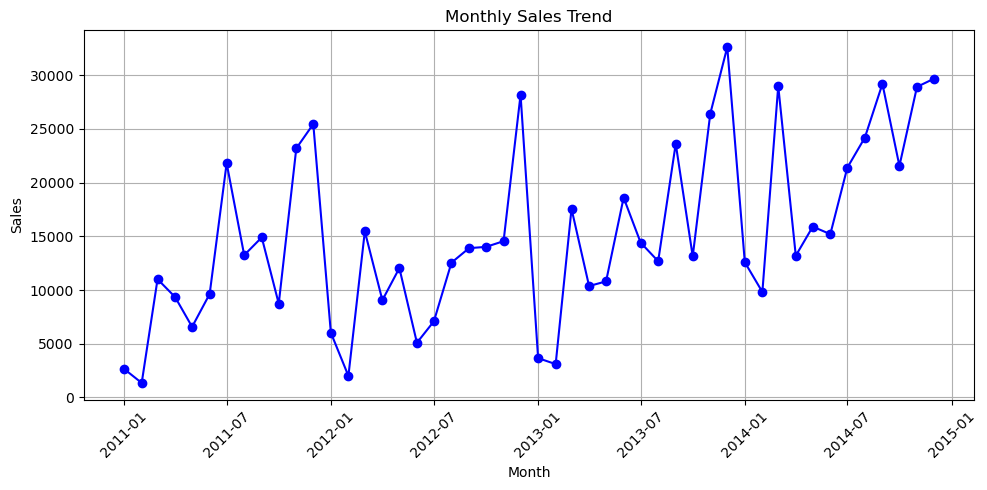

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['Order Month'], monthly_sales['Sales'], linestyle='-', marker='o', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
from sklearn.linear_model import LinearRegression

# 构建时间特征
monthly_sales['Month_Num'] = np.arange(len(monthly_sales))

# 特征和目标
X = monthly_sales[['Month_Num']]
y = monthly_sales['Sales']

# 拟合线性回归模型
model = LinearRegression()
model.fit(X, y)

# 预测未来 6 个月
future_months = pd.DataFrame({'Month_Num': np.arange(len(monthly_sales), len(monthly_sales) + 6)})
future_sales = model.predict(future_months)

# 创建未来 6 个月的日期
future_dates = pd.date_range(
    start=monthly_sales['Order Month'].max() + pd.offsets.MonthBegin(), 
    periods=6, 
    freq='MS'
)

# 构建预测 DataFrame
predicted_df = pd.DataFrame({
    'Order Month': future_dates,
    'Predicted Sales': future_sales
})

predicted_df



,Order Month,Predicted Sales
0,2015-01-01,23242.528963
1,2015-02-01,23574.317619
2,2015-03-01,23906.106276
3,2015-04-01,24237.894933
4,2015-05-01,24569.683589
5,2015-06-01,24901.472246


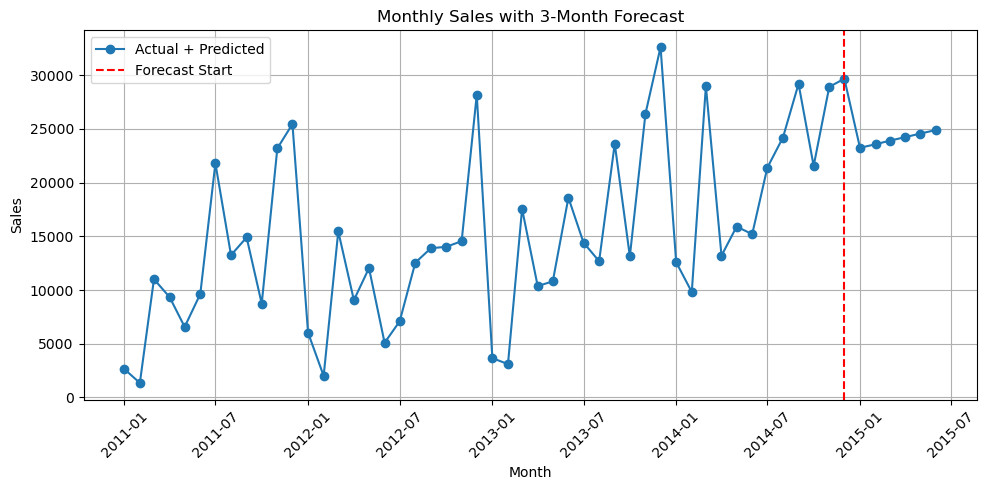

In [45]:
plot_df = pd.concat([
    monthly_sales[['Order Month', 'Sales']],
    predicted_df.rename(columns={'Predicted Sales': 'Sales'})
], ignore_index=True)

plt.figure(figsize=(10, 5))
plt.plot(plot_df['Order Month'], plot_df['Sales'], marker='o', label='Actual + Predicted')
plt.axvline(x=monthly_sales['Order Month'].max(), color='red', linestyle='--', label='Forecast Start')
plt.title('Monthly Sales with 3-Month Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
predicted_df.to_csv('predicted_sales_6_months.csv', index=False)


## Which category are the best selling？ Which is the highest profit category?


In [47]:
# 按 Category 分组，计算销售总额
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sales_by_category.head()


Category
Chairs         101781.36
Phones          98684.39
Tables          84754.60
Storage         70532.84
Accessories     61114.10
Name: Sales, dtype: float64

In [48]:
profit_by_category = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
profit_by_category.head()

Category
Copiers        19327.25
Accessories    16484.62
Binders        16096.78
Paper          12119.10
Phones          9111.06
Name: Profit, dtype: float64

In [49]:
# sales and profit margin 
category_summary = df.groupby('Category')[['Sales', 'Profit']].sum()
category_summary['Profit Margin (%)'] = (category_summary['Profit'] / category_summary['Sales']) * 100
category_summary['Profit Margin (%)']

Category
Accessories    26.973513
Appliances     27.322406
Art            25.772194
Binders        28.764226
Bookcases      -4.573080
Chairs          3.957129
Copiers        38.849345
Envelopes      46.349287
Fasteners      29.808276
Furnishings    25.409266
Labels         45.347450
Machines       -1.458270
Paper          45.451630
Phones          9.232524
Storage        12.257397
Supplies        3.453996
Tables          1.749215
Name: Profit Margin (%), dtype: float64

In [50]:
category_summary_sorted = category_summary.sort_values(by='Profit', ascending=False)
category_summary_sorted 

,Sales,Profit,Profit Margin (%)
Category,,,
Copiers,49749.23,19327.25,38.849345
Accessories,61114.10,16484.62,26.973513
Binders,55961.11,16096.78,28.764226
Paper,26663.73,12119.10,45.451630
Phones,98684.39,9111.06,9.232524
Storage,70532.84,8645.49,12.257397
Appliances,30236.32,8261.29,27.322406
Furnishings,30072.73,7641.26,25.409266
Chairs,101781.36,4027.62,3.957129


<Axes: title={'center': 'Sales vs Profit by Category'}, xlabel='Category'>

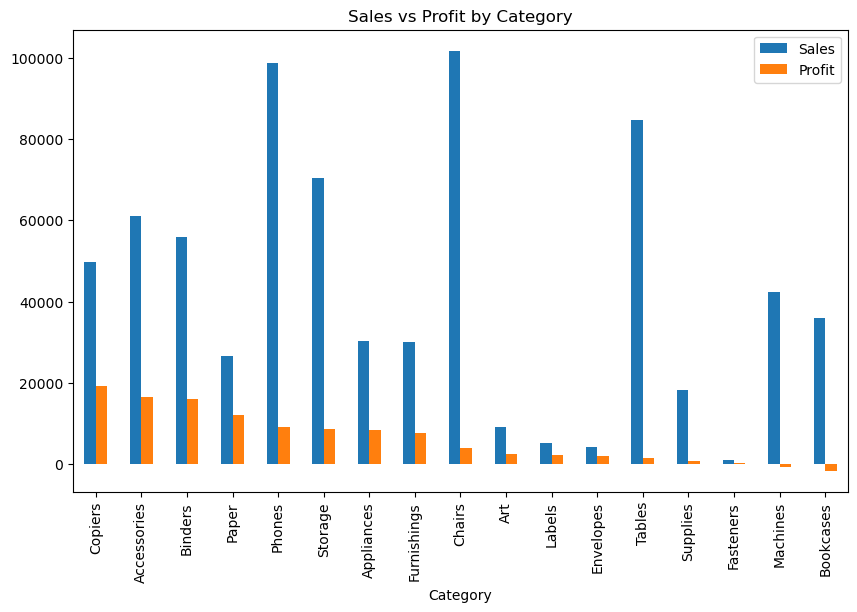

In [51]:
category_summary_sorted[['Sales', 'Profit']].plot(
    kind='bar', 
    figsize=(10, 6), 
    title='Sales vs Profit by Category'
)


## "Though Chairs lead in sales, their low margin (3.96%) significantly reduces their contribution to profit. In contrast, Copiers and Binders have high profit margins above 28%, making them valuable to prioritize. Envelopes and Paper also offer profit margins exceeding 45%, despite smaller volume, representing highly profitable niche products. Meanwhile, Machines and Bookcases operate at a loss and warrant immediate business review."

## who are the top shoppers ? How much sales are? How much profits are?

In [52]:
top_shoppers = df.groupby('EmailID')['Sales'].sum().sort_values(ascending=False)
top_shoppers.head(10)


EmailID
RaymondBuch@gmail.com      14345.28
KenLonsdale@gmail.com       8472.39
EdwardHooks@gmail.com       7447.77
JaneWaco@gmail.com          7391.53
KarenFerguson@gmail.com     7182.76
NickCrebassa@gmail.com      6734.23
ClayLudtke@gmail.com        6069.65
YanaSorensen@gmail.com      5754.17
NoraPreis@gmail.com         5564.60
WilliamBrown@gmail.com      5523.06
Name: Sales, dtype: float64

In [53]:
top_customer_summary = df.groupby('EmailID')[['Sales', 'Profit']].sum()
top_customer_summary = top_customer_summary.sort_values(by='Sales', ascending=False)
top_customer_summary.head(10)


,Sales,Profit
EmailID,,
RaymondBuch@gmail.com,14345.28,6807.08
KenLonsdale@gmail.com,8472.39,426.61
EdwardHooks@gmail.com,7447.77,589.74
JaneWaco@gmail.com,7391.53,2073.29
KarenFerguson@gmail.com,7182.76,878.42
NickCrebassa@gmail.com,6734.23,706.58
ClayLudtke@gmail.com,6069.65,890.33
YanaSorensen@gmail.com,5754.17,1551.61
NoraPreis@gmail.com,5564.60,367.72


In [54]:
top_customer_summary['Profit Margin (%)'] = (top_customer_summary['Profit'] / top_customer_summary['Sales']) * 100
top_customer_summary['Profit Margin (%)']


EmailID
RaymondBuch@gmail.com      47.451705
KenLonsdale@gmail.com       5.035297
EdwardHooks@gmail.com       7.918343
JaneWaco@gmail.com         28.049538
KarenFerguson@gmail.com    12.229561
                             ...    
StuartCalhoun@gmail.com    41.079812
AdrianShami@gmail.com      35.885167
JackLebron@gmail.com       34.924623
SaraLuxemburg@gmail.com    25.225225
ThaisSissman@gmail.com    -66.502463
Name: Profit Margin (%), Length: 686, dtype: float64

## Which state is the highest profit one?


In [55]:
# 按州分组，求总利润
profit_by_state = df.groupby('State')['Profit'].sum().sort_values(ascending=False)

profit_by_state.head(10)

State
California    76381.60
Washington    33402.70
Nevada         3316.76
Utah           2546.56
Montana        1833.32
New Mexico     1157.13
Idaho           826.73
Wyoming         100.20
Oregon        -1190.48
Arizona       -3427.87
Name: Profit, dtype: float64

## “California is by far the most profitable state, contributing over $76K in profit, more than twice the next best, Washington. These two states should be prioritized for growth and retention strategies. However, Arizona and Oregon are currently operating at a loss, requiring a review of cost structure, pricing, or customer targeting.”

## Which cities are high sales but low profits 

In [56]:
city_summary = df.groupby('City')[['Sales', 'Profit']].sum()
city_summary['Profit Margin (%)'] = (city_summary['Profit'] / city_summary['Sales']) * 100


In [57]:
high_sales_low_profit = city_summary[
    (city_summary['Sales'] > 20000) & (city_summary['Profit'] < 1000)
].sort_values(by='Sales', ascending=False)

display(high_sales_low_profit)


,Sales,Profit,Profit Margin (%)
City,,,


In [58]:
# 或者筛选利润率特别低的
risky_cities = city_summary[
    (city_summary['Sales'] > 20000) & (city_summary['Profit Margin (%)'] < 5)
].sort_values(by='Profit Margin (%)')
risky_cities

,Sales,Profit,Profit Margin (%)
City,,,


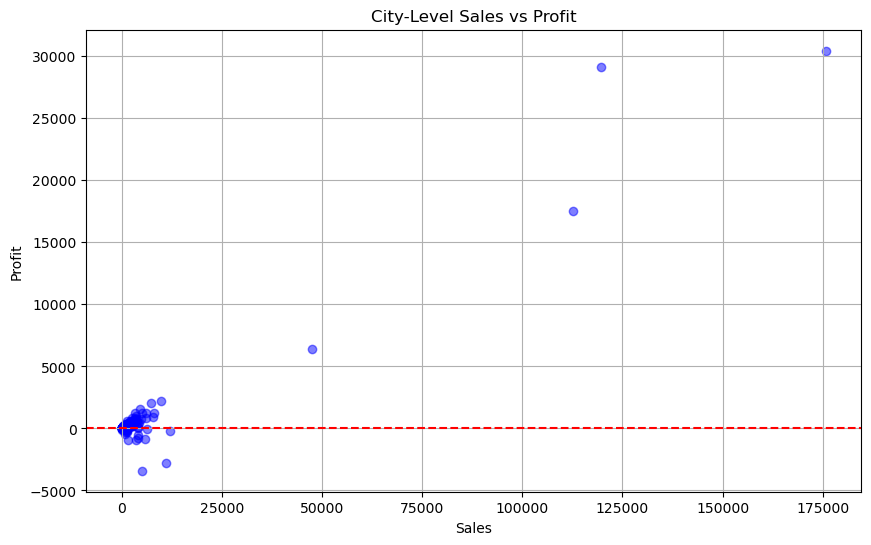

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(city_summary['Sales'], city_summary['Profit'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('City-Level Sales vs Profit')
plt.grid(True)
plt.show()


## average sales per order 

In [60]:
order_sales = df.groupby('Order ID')['Sales'].sum()
order_sales

Order ID
CA-2011-100090     699.19
CA-2011-100363      21.38
CA-2011-100860      18.75
CA-2011-100867     321.55
CA-2011-100881     302.38
                   ...   
US-2014-163657     255.25
US-2014-163790    1158.88
US-2014-166688    1196.32
US-2014-167318    2012.30
US-2014-168802      18.37
Name: Sales, Length: 1611, dtype: float64

In [61]:
average_sales_per_order = order_sales.mean()
average_sales_per_order

np.float64(450.31528864059584)

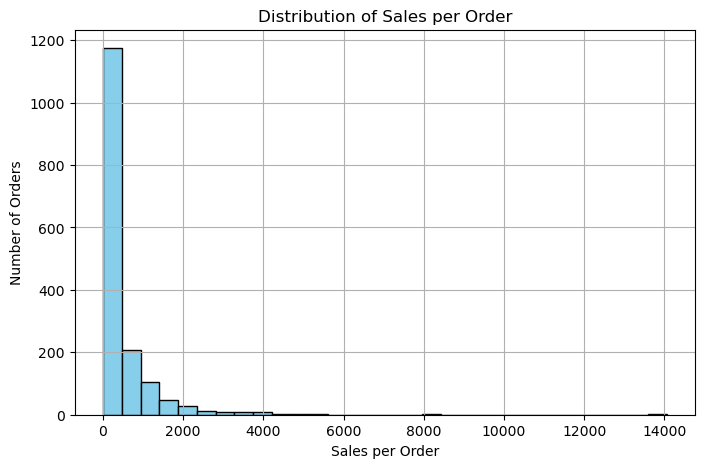

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
order_sales.hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales per Order')
plt.xlabel('Sales per Order')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


## average profit per order 


In [63]:
order_profit = df.groupby('Order ID')['Profit'].sum()
order_profit

Order ID
CA-2011-100090    -19.09
CA-2011-100363      7.72
CA-2011-100860      9.00
CA-2011-100867     20.10
CA-2011-100881     22.68
                   ...  
US-2014-163657      3.59
US-2014-163790    282.44
US-2014-166688     92.02
US-2014-167318    705.27
US-2014-168802      5.97
Name: Profit, Length: 1611, dtype: float64

In [64]:
average_profit_per_order = order_profit.mean()
average_profit_per_order

np.float64(67.2990626939789)

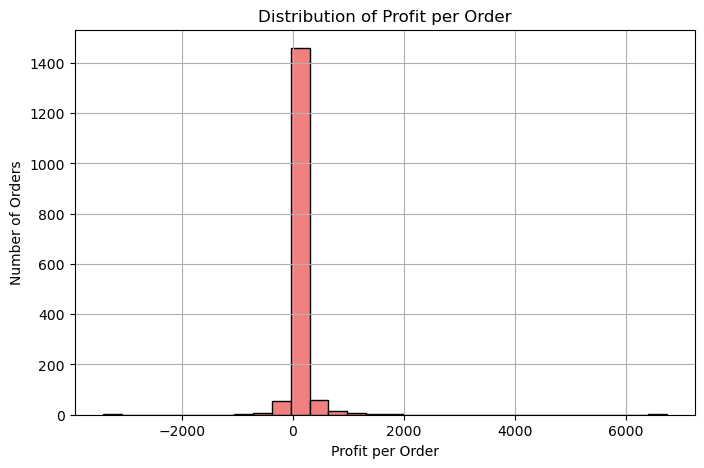

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
order_profit.hist(bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Profit per Order')
plt.xlabel('Profit per Order')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


In [66]:
## from time from order to ship 

In [67]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [68]:
df['Shipping Delay'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Shipping Delay']

0       4
1       5
2       5
3       5
4       5
       ..
3198    4
3199    5
3200    5
3201    5
3202    5
Name: Shipping Delay, Length: 3203, dtype: int64

In [69]:
## average cost of time from order to ship 
df['Shipping Delay'].mean()


np.float64(3.930065563534187)

In [70]:
## lowest ten orders 
df.sort_values(by='Shipping Delay', ascending=False).head(10)


,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit,Month,Country,City,State,Order Month,Shipping Delay
2220,US-2013-126452,2013-08-22,2013-08-29,ScotCoram@gmail.com,"United States,Los Angeles,California",Accessories,LogitechÂ Gaming G510s - Keyboard,254.97,3.0,91.79,8,United States,Los Angeles,California,2013-08,7
2219,US-2013-126452,2013-08-22,2013-08-29,ScotCoram@gmail.com,"United States,Los Angeles,California",Phones,Motorola HK250 Universal Bluetooth Headset,91.96,5.0,-20.69,8,United States,Los Angeles,California,2013-08,7
2218,US-2013-126452,2013-08-22,2013-08-29,ScotCoram@gmail.com,"United States,Los Angeles,California",Binders,Avery Durable Slant Ring Binders,12.67,2.0,4.75,8,United States,Los Angeles,California,2013-08,7
2266,CA-2012-166800,2012-11-19,2012-11-26,AleksandraGannaway@gmail.com,"United States,Las Vegas,Nevada",Appliances,Hoover Commercial Soft Guard Upright Vacuum An...,31.08,4.0,8.39,11,United States,Las Vegas,Nevada,2012-11,7
2253,CA-2012-115420,2012-04-25,2012-05-02,LindaSouthworth@gmail.com,"United States,Los Angeles,California",Envelopes,Laser & Ink Jet Business Envelopes,21.34,2.0,9.82,4,United States,Los Angeles,California,2012-04,7
1347,CA-2011-125829,2011-11-04,2011-11-11,WilliamBrown@gmail.com,"United States,Los Angeles,California",Phones,Polycom SoundPoint Pro SE-225 Corded phone,666.34,7.0,66.63,11,United States,Los Angeles,California,2011-11,7
34,US-2014-107272,2014-11-06,2014-11-13,TroyStaebel@gmail.com,"United States,Phoenix,Arizona",Binders,"Avery Durable Slant Ring Binders, No Labels",2.39,2.0,-1.83,11,United States,Phoenix,Arizona,2014-11,7
3140,CA-2014-137918,2014-09-30,2014-10-07,JoeKamberova@gmail.com,"United States,Lodi,California",Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,97.30,7.0,28.22,9,United States,Lodi,California,2014-09,7
3139,CA-2014-142328,2014-12-08,2014-12-15,TracyCollins@gmail.com,"United States,San Francisco,California",Paper,"REDIFORM Incoming/Outgoing Call Register, 11"" ...",50.04,6.0,25.02,12,United States,San Francisco,California,2014-12,7
589,CA-2013-105963,2013-11-16,2013-11-23,StewartCarmichael@gmail.com,"United States,Los Angeles,California",Accessories,ImationÂ 16GB Mini TravelDrive USB 2.0Â Flash ...,99.39,3.0,40.75,11,United States,Los Angeles,California,2013-11,7


In [71]:
## time to ship in different category 
df.groupby('Category')['Shipping Delay'].mean()


Category
Accessories    3.980620
Appliances     4.088235
Art            4.024000
Binders        3.891720
Bookcases      3.525000
Chairs         3.821256
Copiers        3.240000
Envelopes      3.925373
Fasteners      3.819444
Furnishings    4.006579
Labels         4.034483
Machines       3.974359
Paper          3.822222
Phones         4.021661
Storage        4.018797
Supplies       4.000000
Tables         3.913793
Name: Shipping Delay, dtype: float64

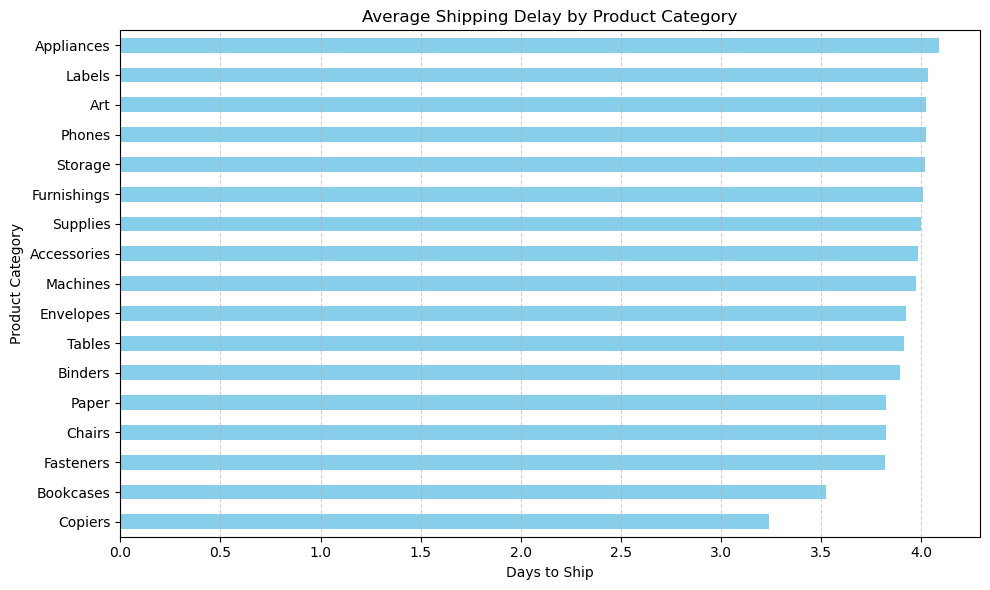

In [72]:
import matplotlib.pyplot as plt

# 对 Shipping Delay 结果排序（从高到低）
shipping_delay_by_category = df.groupby('Category')['Shipping Delay'].mean().sort_values(ascending=True)

# 创建横向柱状图
plt.figure(figsize=(10, 6))
shipping_delay_by_category.plot(kind='barh', color='skyblue')

plt.title('Average Shipping Delay by Product Category')
plt.xlabel('Days to Ship')
plt.ylabel('Product Category')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [73]:
## average time to ship in different state
df.groupby('State')['Shipping Delay'].mean().sort_values()

State
Idaho         3.666667
Colorado      3.681319
California    3.868066
Washington    3.974308
Arizona       4.071429
Oregon        4.314516
Utah          4.358491
Nevada        4.384615
New Mexico    4.513514
Montana       4.600000
Wyoming       5.000000
Name: Shipping Delay, dtype: float64

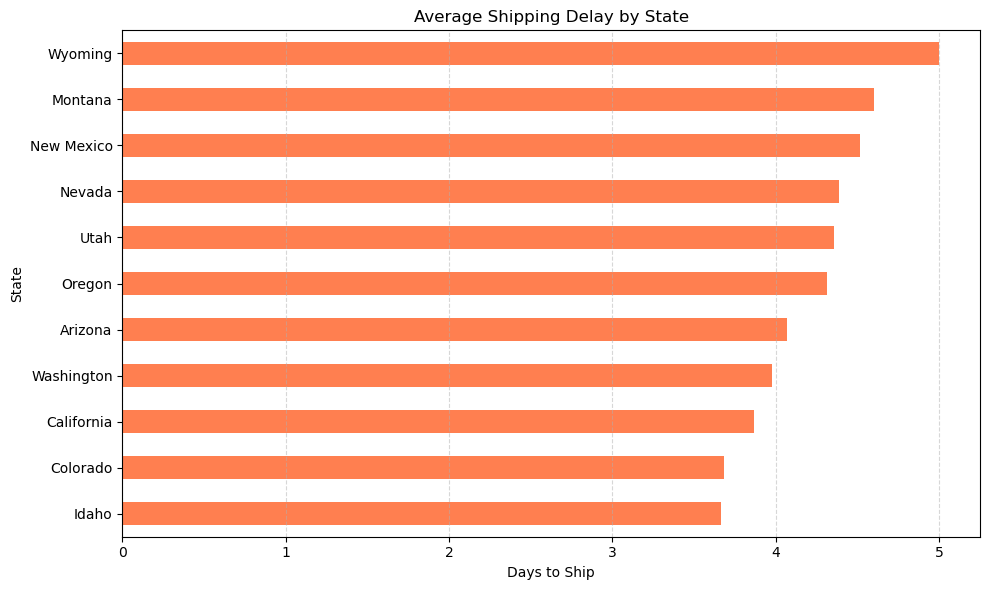

In [74]:
import matplotlib.pyplot as plt

# 分组并排序
shipping_delay_by_state = df.groupby('State')['Shipping Delay'].mean().sort_values(ascending=True)

# 绘图
plt.figure(figsize=(10, 6))
shipping_delay_by_state.plot(kind='barh', color='coral')

plt.title('Average Shipping Delay by State')
plt.xlabel('Days to Ship')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
 ^[[200~https://github.com/NSS-Data-Analytics-Cohort-14/da14-python-assessment-pumpkins-Newbeebeep-1.gi


In [ ]:
https://github.com/NSS-Data-Analytics-Cohort-14/da14-python-assessment-pumpkins-Newbeebeep-1.git